In [7]:
import sys, os
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import random
import cv2
import numpy as np

#画像取り込み、切り抜き、ステータス生成をする
class MonsterGenerator:
    def __init__(self, parent):
        self.parent = parent
        
    #画像を取得し親に渡す
    def capture(self):
        # ファイル選択ダイアログの表示
        file_name = QFileDialog.getOpenFileName(self.parent, 'Open file', './')     # 画像を選択してファイル名を取得
        if file_name[0] == '':
            return    
       
        n = np.fromfile(file_name[0], dtype=np.uint8)# imreadだと日本語のファイル名に対応できないため，np.fromfileとcv2.imdecodeを使う
        image = cv2.imdecode(n, cv2.IMREAD_COLOR) 
        self.image = image
        #画像をセットする
        self.parent.setImage(image)

    #画像を切り抜く
    def crop(self, image):
        return image

    #ステータスを生成して返す
    def generateStatus(self, image):
        return Status()

    def generateMonster(self, image):
        monster = Monster(self.crop(image))
        monster.status = self.generateStatus(image)
        return monster


class Status:
    def __init__(self, hp=0, attack=0, defence=0):
        self.hp = hp
        self.attack = attack
        self.defence = defence
    
class Battle:
    pass

class Monster:
    def __init__(self, image):
        self.status = Status()
        self.image = image

class ImageViewer:
    def __init__(self, parent, image=None, x=0, y=0):
        #super(ImageViewer, self).__init__(parent)
        self.parent = parent
        self.imageLabel = QLabel(parent=self.parent)
        self.imageLabel.move(x, y)
        self.w = 0
        self.h = 0
        self.fixSize = False
        if(image is None):
            self.image = None
            return 
        self.setImage(image)
        self.image = image
    
    def setImage(self, image):
        if self.fixSize:
            image = cv2.resize(image , dsize=(self.w , self.h))
        
        height, width, dim = image.shape
        bytesPerLine = dim * width        
        self.imageLabel.resize(width, height)

        self.imageLabel.resize(width, height)
        image = QImage(image, width, height, bytesPerLine, QImage.Format_RGB888)
        self.imageLabel.setPixmap(QPixmap.fromImage(image))
        self.image = image

    def move(self, x, y):
        self.imageLabel.move(x,y)

    def resize(self, w, h):
        self.fixSize = True
        self.w , self.h = w, h
        if  not(self.image is None): 
            self.setImage(self.image)

class MyWindow(QMainWindow):
    def __init__(self):
        super(MyWindow, self).__init__()
        self.generator = MonsterGenerator(self)
    
        self.initUI()

    def initUI(self):
        self.resize(800, 600) 
        self.setWindowTitle('Color Monsters')
        captureButton = QPushButton('モンスター生成', self)
        captureButton.clicked.connect(self.generator.capture)
        captureButton.move(20,20)

        #self.imageLabel = QLabel("image", self)
        #self.imageLabel.move(200, 200)

        self.imageViewer = ImageViewer(self, x=200, y=200)
        self.imageViewer.resize(100, 100)

        self.show()

    def setImage(self, image):
        self.image = image
        self.player = self.generator.generateMonster(self.image)

        self.imageViewer.setImage(image)
        
        
        

def main():
    app = QApplication(sys.argv)
    w = MyWindow()
    app.exec_()
            
if __name__ == '__main__':
    main()

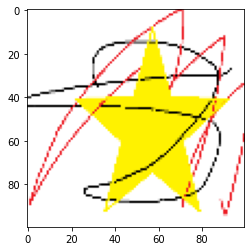

In [146]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

im = cv2.imread("test.png")
im2 = cv2.imread("blue_green.png")
im_rgb=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#im_rgb = im

im_rgb = cv2.resize(im_rgb, (100, 100))
plt.imshow(im_rgb)


[0.28034635 0.35248675 0.36716689]


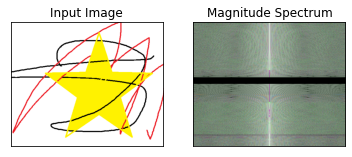

[0.23105833 0.71522883 0.05371284]


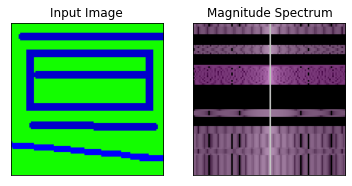

In [156]:
#ステータスを生成して返す
def generateStatus(image):
    rgb_hist = image.T.sum(axis=1).sum(axis=1) 
    rgb_hist = rgb_hist / sum(rgb_hist)
    print(rgb_hist)
    
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    foo = np.abs(fshift)
    foo = np.where(foo < 1, 1, foo)
    magnitude_spectrum = 20 * np.log(foo)

    im_rgb=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(121),plt.imshow(im_rgb)
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(np.round(magnitude_spectrum.astype(np.uint8)), cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
        
    status = Status()
    return status


a = generateStatus(im)
b = generateStatus(im2)